# Ustruktureret data og text mining i Python

## Indhold

### Del 1: Introduktion
- Hvad er ustruktureret data? (genopfriskning)
    - Meget ustruktureret data fra nettet
- Hvad er text mining/NLP?
    - Nævn sprogmodeller o.l. - gennemgås ikke her
- Hurtig udforskning af tekstdata (indhold af hjemmeside - brug af eksisterende tokenizers)
    - Ordskyvisualisering
    - Ordtælling

### Del 2: Web
- Hvordan virker internettet og web?
- Hvordan ser en hjemmeside ud? (browser vs i Python)
- Brug af requests
- Hvordan er HTML bygget op?
- Brug af beautifulsoup

### Del 3: Tekst
- Preprocessing af tekstdata
    - tokenization
    - lemming/stemming
    - Vis manuelt
- tidy text data (tekst data i pandas)
    - Brug af eksisterende tokenizer (spacy)
    - pandas med text data (tweets)
    - string metoder (variable baseret på tekstindhold)
    - seaborn visualiseringer

# Hvad er ustruktureret data?

*Ustruktureret data* er data, som - kort sagt - ikke er sat i system. Hvis data ikke er struktureret, vil man typisk kalde det ustruktureret data. Tekst, billeder og video er typiske eksempler på ustruktureret data, da disse blot er rå information uden nogen måde at adskille en type information fra en anden. Mange moderne dataanalyseteknikker fokuserer på ustruktureret data, hvor man enten udvikler teknikker til at skabe overblik over ustruktureret data eller forsøger at give data en form for struktur.

Nedenstående er et eksempel på ustruktureret data:

```
["Hvorfor går man ikke i dialog med ⁦@DRC_dk⁩ i stedet for at opsige kontrakten uden varsel. Er det kun for at føre stærk mand politik? DRC yder en fremragende indsats på baggrund af den opgave de har fået #dkpol https://jyllands-posten.dk/indland/ECE12248020/tesfaye-forsoeger-sig-med-en-ny-loesning-paa-alle-udlaendingeministres-problem/ …",
"Alle tæller ❤️ https://twitter.com/cekicozlem/status/1276034922587832326 …",
"Det er så godt arbejde💚 https://twitter.com/fannybroholm/status/1275360842847080449 …",
"Tilfreds med den klima og energiaftale, der er lavet nu. Det er den første delaftale om at nå 70% reduktion i 2030. Særligt glad for at den indeholder principaftale om en CO2 afgiftsreform #dkpol #dkgreen pic.twitter.com/3slrMxLT5B",
"Godt første skridt for den fri natur #dkpol #dkgreen ⁦@alternativet_⁩ https://www.altinget.dk/miljoe/artikel/wermelin-lander-aftale-om-de-foerste-naturnationalparker …",
"Spændende udmelding. ⁦@alternativet_⁩ ønsker også en grøn   Klimaafgift, hvor udgangspunktet er at forureneren betaler #dkgreen #dkpol https://www.altinget.dk/artikel/venstre-og-radikale-laegger-faelles-pres-paa-regeringen-vil-have-ensartet-co2-afgift?SNSubscribed=true&ref=newsletter&refid=fredag-middag-190620&utm_campaign=altingetdk%20Altinget.dk&utm_medium%09=e-mail&utm_source=nyhedsbrev …",
"Så vigtigt at KL tager ansvar for den proces #dkpol #dkgreen https://www.altinget.dk/miljoe/artikel/professor-om-affaldsaftale-kl-og-kommunerne-skal-gribe-chancen-for-at-loese-tingene-selv …",
"Hurra - stor dag for Danmark💚👏🏼👏🏼 https://twitter.com/alternativet_/status/1273555055476723713 …",
"Til klimaforhandlinger i Finansministeriet. Vi sidder og diskuterer rammerne - de næste dage bliver intensive #dkpol #dkgreen @alternativet_ @ Christiansborg Palace  https://www.instagram.com/p/CBi3d0oB9lB/?igshid=ii78cjnx2n72 …",
"Aftale om mindre affald, mindre forbrænding og mere genbrug - god dag for klimaet og miljøet. 1. skridt i en stor miljøpakke #dkpol ⁦@alternativet_⁩ https://www.dr.dk/nyheder/indland/live-regeringen-praesenterer-ny-aftale-om-affald …"]
```

I ovenstående kan man stadig overføre ideen om observationer (i dette tilfælde tweets fra danske politikere), men der er ingen variable eller features givet på forhånd. Der er derfor ingen umiddelbar struktur at gøre brug af for at foretage sig analyser.

## Hvorfor er ustruktureret data interessant?

En rigtig stor del af det data, som produceres, er ustruktureret. Tænk på hvor meget data, der produceres på hjemmesider, sociale medier o.l. Det meste af dette er i form af tekst; altså ustruktureret. 


# Text mining og NLP

Fordi så meget data er i form af ustruktureret tekst, er der brug for metoder og teknikker til at behandle disse. Disse teknikker og metoder omtales overordnet som "text mining" og "natural language processing" (NLP). De to termer bruges lidt synonymt. "Text mining" er mest et dataanalyse term, mens NLP er en gren af computervidenskab. Groft sagt er forskellen, at NLP er videnskaben/metoder til at få en computer til at forstå tekst, mens "text mining" er analyseværktøjerne til at udlede mønstre i tekst.

In [2]:
# Installer spacy's danske sprogmodel
#! python -m spacy download da_core_news_sm

In [3]:
# Datahåndtering
import numpy as np
import pandas as pd

# NLP
import spacy
import string
from spacy.tokenizer import Tokenizer

# Web scraping
from bs4 import BeautifulSoup as bs
import requests

# Visualisering
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sæt visualiseringsindstillinger
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

# Indlæs sprogmodel
nlp = spacy.load("da_core_news_sm")

# Ustruktureret data - et hurtigt overblik

Vi starter med et hurtigt eksempel, der gennemgår et typisk workflow med tekst mining (med lidt web scraping blandet ind i):

1. Tekst indlæses (her forsiden af TV2 nyheder)
2. Tekst udvælges (her selve nyhederne på forsiden)
3. Tekst behandles ("tokenization")
    - Fjern stopord
    - Fjern tegnsætning
    - Udvalg af bestemt ordtype
4. Analyse foretages (her ordtælling og ordsky-visualisering)

Formålet med lektionen er at dykke ned i hvert af disse skridt.

## 1. Tekst indlæses

In [63]:
url = "https://nyheder.tv2.dk/"
url_content = requests.get(url).content
dr_soup = bs(url_content)

## 2. Tekst udvælges

In [64]:
texts = dr_soup.find_all("a", class_ = "o-teaser_link")
texts = [text.get_text() for text in texts]
text = ''.join(texts)

## 3. Tekst behandles ("tokenization")

In [68]:
doc = nlp(text)
words = []

tokenizer = Tokenizer(nlp.vocab)
pos_tag = ['PROPN', 'ADJ', 'NOUN']
stopwords = list(nlp.Defaults.stop_words) + ["LIVE"]
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        words.append(token.text)

## 4. Tekst analyseres

### Ordtælling

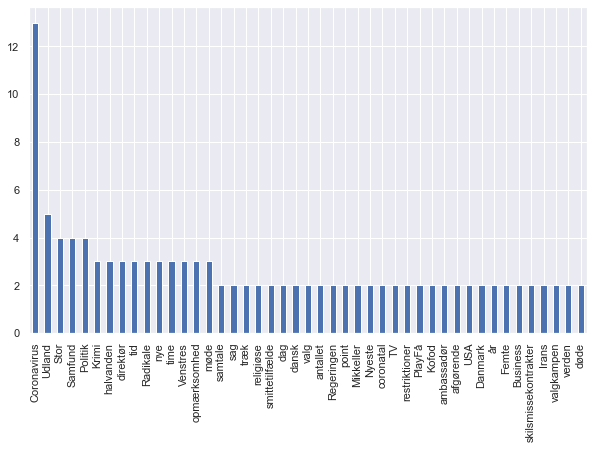

In [69]:
counts = pd.Series(words).value_counts()
counts = counts[counts > 1]

counts.plot.bar()

### Ordsky

(-0.5, 399.5, 199.5, -0.5)

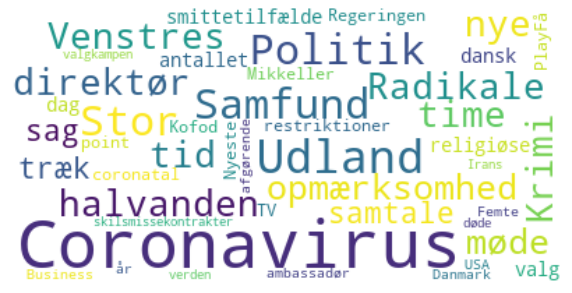

In [70]:
wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Data fra nettet - Web scraping

## Hvad er web scraping?

"Web scraping" er en paraplybetegnelse for automatiske teknikker til at indsamle information fra internettet (altså indsamling som ikke foregår via en browser).

At arbejde med web scraping involverer både at indsamle rådata fra internettet samt behandle og konvertere disse data til et format, som er til at arbejde med. 

## Hvorfor er web scraping relevant? (for samfundsvidenskaberne)

1. Internettet er i sig selv et relevant genstandsfelt.
Internettet er i dag fuldstændig integreret i vores hverdagsliv. Både information på internettet og vores brug af det giver indblik i vaner, forbrug, interaktion.

2. Internettet er en datakilde
Internettet er en stor samling af information. Vi har brug for teknikker til at systematisk at indhente information derfra.

## Hvad er internettet *egentlig*? 

- The internet: A global system of interconnected computers
    - Internet: Interconnected Network

- The (World Wide) Web (WWW): Collection of resources accessible over the internet

- The web can be regarded as the navigable and ”public” parts of the internet

- Every computer or server on the internet is uniquely identified via an IP-adress (fx 127.28.115.253)
    - IP: Internet Protocol
- When accessing the internet via the web, we are contacting another computer or server and retrieving information
- On the web URL’s are used to provide unique (and sensible) adresses for each computer
    - URL: Uniform Ressource Locators
- The association between IP’s and URL’s is handled by DNS servers
    - DNS: Domain Name System

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/Internet_map_1024_-_transparent%2C_inverted.png" alt="opte" width="600"/>

*Opte Project 2005*

## Sådan virker internettet ("the web") - Kort fortalt

![dns](https://cdn2.wpbeginner.com/wp-content/uploads/2019/06/howdomainswork.png)

*wpbeginner.com*

## Internettet gennem din browser versus gennem Python

### Internettet gennem din browser

![browser_img](./img/website_browser.png)

Ovenstående er internettet, som I kender det (måske nogen kender den del af internettet lidt for godt). Hvordan ser det ud gennem Python?

### Internettet gennem Python

In [9]:
print(requests.get("https://www.reddit.com/r/PrequelMemes/").content[0:4000])

b'<!DOCTYPE html><html lang="en-US"><head><script>\n    var __SUPPORTS_TIMING_API = typeof performance === \'object\' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;\n    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };\n    var __firstPostLoaded = false;\n    function __markFirstPostVisible() {\n      if (__firstPostLoaded) { return; }\n      __firstPostLoaded = true;\n      __perfMark("first_post_title_image_loaded");\n    }\n    var __firstCommentLoaded = false;\n    function __markFirstCommentVisible() {\n      if (__firstCommentLoaded) { return; }\n      __firstCommentLoaded = true;\n      __perfMark("first_comment_loaded");\n    }\n  </script><script>\n          __perfMark(\'head_tag_start\');\n        </script><title>reddit: the front page of the internet</title><meta charSet="utf-8"/><meta name="robots" content="noindex,nofollow"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="re

Sikke en rodebutik!

## Hvad betyder alt det her?

Det er værd at være opmærksom på, hvordan internettet egentlig hænger sammen, hvis vi forsøger at gøre noget med data fra det. Typisk er vores indgang til internettet gennem browsere eller apps, hvor alting er sat op sådan, at vi ikke behøver at forholde sig til disse ting.

Når vi arbejder med data fra internettet, er det altid data, som ligger et eller andet sted (på en server) ofte i et format, der i sin rå form ikke giver meget mening at arbejde med (rå HTML).

# Adgang til internettet via Python (`requests`)

In [75]:
import requests

url = "https://nyheder.tv2.dk/"
req = requests.get(url)

Kom vi igennem?

In [76]:
print(str(req.status_code), str(req.reason))

200 OK


Hvad indeholder siden?

In [77]:
content = req.content
print(content[0:1000])

b'<!DOCTYPE html>\n<html lang="da-DK" class="site-nyheder">\n<head>\n\n  <meta charset="utf-8"/>\n  <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n\n  <meta name="viewport" content="width=device-width,initial-scale=1.0"/>\n  <meta name="msapplication-TileImage" content="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <meta name="msapplication-TileColor" content="#fff"/>\n  <meta name="format-detection" content="telephone=no"/>\n  <link rel="apple-touch-icon-precomposed" href="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <link rel="shortcut icon" href="https://shared.tv2.dk/favicon.ico" />\n\n  <!-- inline base CSS -->\n  <style type="text/css" media="screen">\n    @charset "UTF-8";@font-face{font-family:AlrightSansLT-Regular;src:url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff2) format("woff2"),url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff

Det, som vi får, er hjemmesidens "rå" indhold; altså HTML.

## En hurtig introduktion til HTML

HTML er et helt kodesprog i sig selv og kan tage lang tid at mestre. Vi behøver dog kun et overordnet kendskab til dens opbygning for at kunne navigere i det.

- HTML consists of tags <>
- The tags are always in hierarchical structure - like a tree

Below is a HTML string example in python:

In [78]:
html = '''
<html>
    <body>
        <div id="convo1">
            <p class="kenobi">Hello There!</p>
        </div>
        <div id="convo2">
            <p class="grievous">General Kenobi!</p>
        </div>
        <div id="convo3">
            <p class="kenobi">So Uncivilized!</p>
        </div>
    </body>
</html>
'''

### HTML Tags

- Tags are used to indicate elements
- Tags can contain attributes: 
    - Classes: `<div class="class!">`
    - Id's: `<div id="div2">`
    - id's should be unique
    - classes do not need to be unique
    - Examples of attributes: href, rel, type
 

## Naviger HTML med BeautifulSoup

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

"BeautifulSoup" pakken er udviklet til at navigere i HTML. Den virker ved at omdanne html til et "soup"-objekt, hvor man kan pege på specifikke tags og udlede indhold

In [45]:
from bs4 import BeautifulSoup as bs

soup = bs(html, "html.parser")
soup


<html>
<body>
<div id="convo1">
<p class="kenobi">Hello There!</p>
</div>
<div id="convo2">
<p class="grievous">General Kenobi!</p>
</div>
<div id="convo3">
<p class="kenobi">So Uncivilized!</p>
</div>
</body>
</html>

Det ligner det samme stykke tekst, men der kan nu navigeres efter de forskellige tags:

In [46]:
set(tag.name for tag in soup.find_all())

{'body', 'div', 'html', 'p'}

In [47]:
soup.find("p") # Finder første p tag

<p class="kenobi">Hello There!</p>

In [48]:
soup.find_all("p") # Finder alle p tags

[<p class="kenobi">Hello There!</p>,
 <p class="grievous">General Kenobi!</p>,
 <p class="kenobi">So Uncivilized!</p>]

In [49]:
soup.find("p").get_text() # Tager teksten ud

'Hello There!'

In [51]:
texts = [] # Teksten for alle tags

for tag in soup.find_all("p"):
    texts.append(tag.get_text())
    
print(texts)

['Hello There!', 'General Kenobi!', 'So Uncivilized!']


In [52]:
soup.find("div", id = "convo2").get_text() # Find ud fra bestemt id

'\nGeneral Kenobi!\n'

In [53]:
soup.find("div", id = "convo2").get_text(strip = True) # Samme ovenstående, men fjerner whitespace (fx \n som indikerer ny linje)

'General Kenobi!'

In [54]:
soup.find("p", class_ = "kenobi").get_text() # Find ud fra bestemt klasse

'Hello There!'

### Find de rigtige tags

At finde de rigtige tags at finde tekst ud fra kræver lidt forarbejde. Det nemmeste er ved at bruge "Code Inspector" funktionen, som findes i de fleste browsere. 

![inspector](./img/inspector.png)

HTML kan være meget rodet, så det involverer ofte at prøve sig lidt frem.

Bemærk fx at et tag kan indeholde flere klasser (adskilt med mellemrum). Dog behøver vi kun en af dem, for at matche det med BeautifulSoup.

På forsiden af indlandssektionen på nyheder.tv2.dk kan vi se, at overskrifter befinder sig i et `<a>` tag med klasserne: `dre-teaser-title dre-teaser-title--xxs-xx-small dre-teaser-title--xs-x-small dre-teaser-title--sm-small dre-teaser-title--md-large`.

Vi kan dog nøjes med den første (`dre-teaser-title`) for at matche det (det kan dog være, at dette matcher meget andet også.

Vi har allerede HTML-indholdet fra nyheder.tv2.dk læst ind som `content`, som vi kan konvertere til et soup-objekt:

In [79]:
soup = bs(content)

Vi kan derefter udlede overskrifter baseret på klassen:

In [81]:
soup.find("a", class_ = "o-teaser_link").get_text(strip = True)

'331 smittet siden tirsdag - antallet af indlagte falder'

In [87]:
for tag in soup.find_all("a", class_ = "o-teaser_link"):
    print(tag.get_text(strip=True))

331 smittet siden tirsdag - antallet af indlagte falder
KrimiByret frifinder sygeplejerske i sag om dødelig medicinfejl
CoronavirusNyt badge skal få folk til at holde afstand fra sårbare
CoronavirusFemte dag i træk med under 500 nye smittetilfælde
CoronavirusRegeringen forlænger restriktioner: - Det er afgørende, at vi holder fast nu
CoronavirusNyeste coronatal fra Danmark og verden: Så mange er smittede, døde og indlagte
PolitikLIVEStor opmærksomhed om Det Radikale Venstres møde - er gået halvanden time over tid
BusinessMikkeller får ny direktør efter 15 år
CoronavirusRegeringen forlænger restriktioner: - Det er afgørende, at vi holder fast nu
CoronavirusLIVEHeunicke kan ikke garantere genåbning før nytår
CoronavirusNyeste coronatal fra Danmark og verden: Så mange er smittede, døde og indlagte
PolitikLIVEStor opmærksomhed om Det Radikale Venstres møde - er gået halvanden time over tid
CoronavirusSundhedsministeriet indkalder til pressemøde klokken 14
USA valg 2020Først ville Trump sle

### Hvad med links?

Ofte i web scraping kan det give mening at indsamle links. På den måde kan man sætte "crawlers" op, der ...
1. Går til en hjemmeside
2. Indsamler indhold
3. Indsamler links
4. Indsamler indhold på hver side, som der linkes til
5. (gentag)

Links er altid med et `<a>` tag i en attribut `href`. Et tag kan have flere attributes (`id` og `class` er fx attributes). Med et soup objekt for et bestemt tag, kan man udlede et bestemt attribut med `[]`:

In [90]:
soup.find("a", class_ = "o-teaser_link")['href']

'/2020-10-07-lige-nu'

Der er i ovenstående tale om et relativt link (et, der bygger videre på hovedadressen: https://nyheder.tv2.dk/), så vi kan færdiggøre linket ved at paste det sammen:

In [91]:
"https://nyheder.tv2.dk" + soup.find("a", class_ = "o-teaser_link")['href']

'https://nyheder.tv2.dk/2020-10-07-lige-nu'

Hvis vi ser på selve HTML indholdet af et tag for en overskrift kan vi se, at der også er et tag attribute:

In [92]:
soup.find("a", class_ = "o-teaser_link")

<a class="o-teaser_link" href="/2020-10-07-lige-nu" title="331 smittet siden tirsdag - antallet af indlagte falder">
<header class="o-teaser_header">
<h2 class="o-teaser_headline font-h4">

           331 smittet siden tirsdag - antallet af indlagte falder
          </h2>
</header>
</a>

Vi kan derfor alternativt udlede overskrifter på nyheder.tv2.dk med følgende (som giver et lidt pænere resultat):

In [93]:
for tag in soup.find_all("a", class_ = "o-teaser_link"):
    print(tag['title'])

331 smittet siden tirsdag - antallet af indlagte falder
Byret frifinder sygeplejerske i sag om dødelig medicinfejl
Nyt badge skal få folk til at holde afstand fra sårbare
Femte dag i træk med under 500 nye smittetilfælde
Regeringen forlænger restriktioner: - Det er afgørende, at vi holder fast nu
Nyeste coronatal fra Danmark og verden: Så mange er smittede, døde og indlagte
Stor opmærksomhed om Det Radikale Venstres møde - er gået halvanden time over tid
Mikkeller får ny direktør efter 15 år
Regeringen forlænger restriktioner: - Det er afgørende, at vi holder fast nu
Heunicke kan ikke garantere genåbning før nytår
Nyeste coronatal fra Danmark og verden: Så mange er smittede, døde og indlagte
Stor opmærksomhed om Det Radikale Venstres møde - er gået halvanden time over tid
Sundhedsministeriet indkalder til pressemøde klokken 14
Først ville Trump slet ikke forhandle, men nu vil han gerne lidt alligevel - og det koster point i valgkampen
Undersøgelse anbefaler fyring af direktør i Forsvar

# ØVELSE: Basal web scraping

Lad os prøve at skrive et program, der finder overskrifter på Berlingske (https://www.berlingske.dk/nyheder).

1. Indlæs HTML-indholdet af forsiden af Berlingske med `requests.get(url).content` (husk at gemme det i et objekt)
2. Konverter HTML-indholdet til et soup-objekt med `bs(content)` (husk at gemme det i et objekt)
3. Print tekstindholdet af det første `<h4>` tag (brug `soup.find()` og `.get_text()`)

**BONUS**
4. Skriv et stykke kode, der udleder linket til den første artikelpå https://www.berlingske.dk/nyheder (udforsk HTML enten direkte i python eller gennem din browser)

## LØSNING

In [104]:
# 1
html = requests.get("https://www.berlingske.dk/nyheder").content

# 2
ber_soup = bs(html)

# 3
print(ber_soup.find("h4").get_text(strip = True))

# 4
print("https://www.berlingske.dk/" + ber_soup.find("a", class_ = "teaser__title-link")['href'])

Konservative og LA laver udskiftning på statsrevisorpost
https://www.berlingske.dk//politik/konservative-og-la-laver-udskiftning-paa-statsrevisorpost


# At arbejde med tekst data

Lad os arbejde lidt videre med artikeloverskrifter fra nyheder.tv2.dk, men først skal vi have lidt data at arbejde med.

Vi opbygger herunder en dictionary, der indeholder artikeloverskrifter og links. Vi konverterer derefter denne dictionary til en pandas dataframe.

In [133]:
url = "https://nyheder.tv2.dk/"
req = requests.get(url)
content = req.content
soup = bs(content)

ber_dict = {}
key = 0

for tag in soup.find_all("a", class_ = "o-teaser_link"):
    article_dict = {}
    article_dict["title"] = tag['title']
    article_dict["link"] = tag['href']
    ber_dict[key] = article_dict
    key = key + 1
    
article_data = pd.DataFrame.from_dict(ber_dict, orient = "index")

In [146]:
article_data.head()

,title,link,corona,trump
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False
2,Ekstra Bladet giver påtaler til tre medarbejde...,//nyheder.tv2.dk/samfund/2020-10-07-ekstra-bla...,False,False
3,Byret frifinder sygeplejerske i sag om dødelig...,//nyheder.tv2.dk/krimi/2020-10-07-byret-frifin...,False,False
4,Nyt badge skal få folk til at holde afstand fr...,//nyheder.tv2.dk/samfund/2020-10-07-nyt-badge-...,False,False


Hvor mange artikler indeholder corona?

In [142]:
article_data['title'].str.contains("corona", case = False).sum()

7

Hvor mange artikler indeholder Trump?

In [144]:
article_data['title'].str.contains("trump", case = False).sum()

3

Tilføjet som variabel:

In [163]:
article_data['corona'] = article_data['title'].str.contains("corona", case = False)
article_data['trump'] = article_data['title'].str.contains("trump", case = False)

article_data.head()

,title,link,corona,trump
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False
2,Ekstra Bladet giver påtaler til tre medarbejde...,//nyheder.tv2.dk/samfund/2020-10-07-ekstra-bla...,False,False
3,Byret frifinder sygeplejerske i sag om dødelig...,//nyheder.tv2.dk/krimi/2020-10-07-byret-frifin...,False,False
4,Nyt badge skal få folk til at holde afstand fr...,//nyheder.tv2.dk/samfund/2020-10-07-nyt-badge-...,False,False


Er der artikler om trump og corona? (ikke 7/10-2020)

In [164]:
article_data.loc[(article_data['corona'] == True) & (article_data['trump'] == True), :]

,title,link,corona,trump


In [165]:
grouped_df = article_data.groupby(['corona', 'trump'])

grouped_df.size()

corona  trump
False   False    40
        True      3
True    False     7
dtype: int64

# ØVELSE: Indhold i tekst

Datasættet 'pol-tweets-2020_sample.csv' (link) indholder et udtræk af 500 tilfældige tweets fra danske politikere.

1. Lav en variabel, der indikerer, om tweetet indeholder ordet "klima"
2. Find ud af hvor mange tweets, der nævner "klima"

## LØSNING

In [175]:
tweets = pd.read_csv('../data/pol-tweets-2020_sample.csv')

# 1
tweets['klima'] = tweets['tweet'].str.contains("klima", case = False)

# 2
print(tweets['klima'].sum())

tweets.loc[tweets['klima'] == True, :].head()

35


,date,hashtags,name,time,tweet,urls,username,klima
12,2020-06-04,['#dkgreen'],Rasmus Stoklund,19:36:04,Flot ros til #dkgreen 🍀 https://twitter.com/Kl...,['https://twitter.com/KlimaMin/status/12685598...,rstoklund,True
16,2020-05-05,"['#grøngenstart', '#dkpol']",Josephine Fock,21:25:48,Og derfor skal vi genstarte DK klogt med en kl...,['https://twitter.com/politikdr/status/1257749...,josephinefock,True
40,2020-05-26,['#dkgreen'],Mette Abildgaard,19:02:45,Til klimamødet i aften vil @SorenPape og jeg e...,[],metteabildgaard,True
54,2020-06-09,"['#dkpol', '#dkgreen']",Signe Munk,22:36:57,Vi skal brænde mindre træ af i Danmark. Vejen ...,['https://www.information.dk/indland/2020/06/e...,signe_munk,True
66,2020-01-22,"['#dkpol', '#dkgreen']",Signe Munk,09:05:41,De nye tal viser med al tydelighed at drivhusg...,['https://www.dr.dk/nyheder/politik/torre-forh...,signe_munk,True


Hvem snakker om klima?

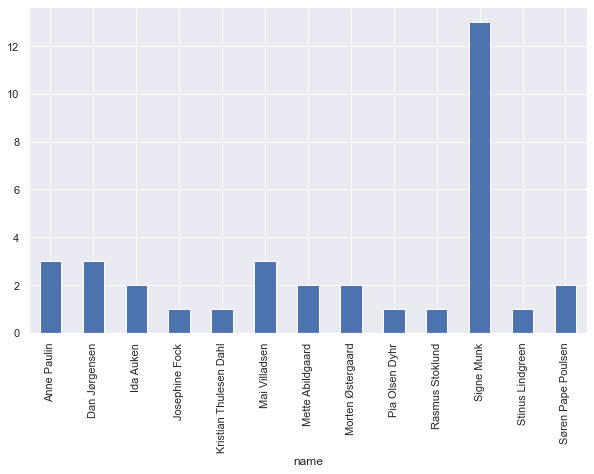

In [179]:
tweets.loc[tweets['klima'] == True, :].groupby('name').size().plot.bar()

# Udledning af nøgleord

Lad os vende tilbage til forsideartiklerne.

- Hvad bliver der særligt diskuteret i dag?
- Hvilke artikler behandler det mest diskuteret tema?

## Tokenization

"Tokenization" er et typisk skridt i behandlingen af tekst data. Tokenization er processen, der omdanner rå tekst til enkelte tekstenheder (tokens) - typisk i form af enkeltord.

1. Opdeling af tekst i enkeltord
2. Frasortering af tegnsætning
3. Evt. konverter til små bogstaver
4. Frasorter stopord
5. Evt. konverter til "stammen" (stemming eller lemmatization)

Der findes efterhånden mange værktøjer der kan udføre tokenization.

Først tager vi skridt 1-4 mere basale Python kommandoer. Derefter ser vi på den smarte løsning.

### 1. Opdeling af tekst i enkeltord

In [181]:
heading = "Først ville Trump slet ikke forhandle, men nu vil han gerne lidt alligevel - og det koster point i valgkampen"

words = heading.split(" ")

words

['Først',
 'ville',
 'Trump',
 'slet',
 'ikke',
 'forhandle,',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 '-',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 2. Frasortering af tegnsætning

In [186]:
punct_list = [',', '-','.','?','!']

words_nopunct = []

for word in words:
    for punct in punct_list:
        word = word.replace(punct, "")
    words_nopunct.append(word)
    
words_nopunct = list(filter(None, words_nopunct))
words_nopunct

['Først',
 'ville',
 'Trump',
 'slet',
 'ikke',
 'forhandle',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 3. Konverter til små bogstaver

In [188]:
words_lower = [word.lower() for word in words_nopunct]
words_lower

['først',
 'ville',
 'trump',
 'slet',
 'ikke',
 'forhandle',
 'men',
 'nu',
 'vil',
 'han',
 'gerne',
 'lidt',
 'alligevel',
 'og',
 'det',
 'koster',
 'point',
 'i',
 'valgkampen']

### 4. Frasorter stopord

In [204]:
stopwords = ['først', 'ville', 'slet', 'ikke', 'men', 'nu', 'vil', 'han', 'gerne', 'lidt', 'alligevel', 'og', 'det', 'koster', 'i']

tokens = []

for word in words_lower:
    if word not in stopwords:
        tokens.append(word)
        
tokens

['trump', 'forhandle', 'point', 'valgkampen']

### 5. Stemming / lemmatization

Formålet med tokenization er både at frasortere støj i teksten og ensrette tokens sådan, at der kun er ét token for alle ord med samme semantiske betydning.

Fx er det uhensigtsmæssigt at behandle "Valgkamp" og "valgkamp" som to forskellige tokens, da det er det samme ord.

Netop fordi hvert ord som udgangspunkt behanldes som unikt, giver det nogen udfordring ift. grammatik, da hver ordbøjning bliver hver sit token - medmindre man gør noget ved det!

Derfor er en typisk praksis enten at konvertere ordet til stammen (stemming). Her ville ord som "koste", "koster", "kostede" alle konverteres til "kost", da det er ordets stamme.

En anden praksis er at konvertere til navneformen (lemmatization). Her ville ord som "koste", "koster", "kostede" alle konverteres til "koste", da det er navneform for ordet.

Sådanne konverteringer kræver, at man bruger i forvejen trænede sprogmodeller, da stamme og navneform vil variere fra sprog til sprog. Heldigvis er der udviklet mange af disse værktøjer.

### Tokenization med spacy

Ovenstående er en noget langsommelige proces. Lad os prøve med en tokenizer fra pakken "spacy".

In [234]:
nlp = spacy.load("da_core_news_sm") # Indlæsning af dansk sprogmodel

doc = nlp(heading) # Behandling af tekststykke med sprogmodel

In [195]:
for token in doc:
    print(token.text)

Først
ville
Trump
slet
ikke
forhandle
,
men
nu
vil
han
gerne
lidt
alligevel
-
og
det
koster
point
i
valgkampen


In [197]:
for token in doc:
    print(token.lemma_)

Først
ville
Trump
slette
ikke
forhandle
,
men
nu
ville
han
gerne
lidt
alligevel
-
og
det
koste
point
i
valgkamp


In [199]:
for token in doc:
    print('{0:10.10} {1}'.format(token.text, token.pos_))

Først      ADV
ville      AUX
Trump      VERB
slet       ADV
ikke       ADV
forhandle  VERB
,          PUNCT
men        CCONJ
nu         ADV
vil        AUX
han        PRON
gerne      ADV
lidt       ADJ
alligevel  ADV
-          PUNCT
og         CCONJ
det        PRON
koster     VERB
point      NOUN
i          ADP
valgkampen NOUN


Bemærk at "Trump" er fejlklassificeret

Med sprogmodellen i spacy følger i øvrigt en prædefineret stopordsliste:

In [202]:
list(nlp.Defaults.stop_words)[0:10]

['jeg',
 'været',
 'alt',
 'ses',
 'sig',
 'syntes',
 'en',
 'imellem',
 'hvilke',
 'nær']

Fra standardpakken `string` kan vi skaffe tegnsætning:

In [203]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Med disse værktøjer kan vi danne vores token-liste på følgende måde. Vi kan samtidig filtere efter bestemte ordklasser:

In [237]:
tokens = []

tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
stopwords = list(nlp.Defaults.stop_words)
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text.lower() in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        tokens.append(token.text.lower())
        
tokens

['point', 'valgkampen']

## Udled nøgleord - liste tilgang

Lad os nu kombinere ovenstående til at udlede nøgleord af avisartiklerne. Vi kan samtidig filtere efter bestemte ordklasser.

In [238]:
article_data.head()

,title,link,corona,trump
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False
2,Ekstra Bladet giver påtaler til tre medarbejde...,//nyheder.tv2.dk/samfund/2020-10-07-ekstra-bla...,False,False
3,Byret frifinder sygeplejerske i sag om dødelig...,//nyheder.tv2.dk/krimi/2020-10-07-byret-frifin...,False,False
4,Nyt badge skal få folk til at holde afstand fr...,//nyheder.tv2.dk/samfund/2020-10-07-nyt-badge-...,False,False


In [239]:
headings = ' '.join(list(article_data['title'])) # Al tekst samles i en string

In [241]:
doc = nlp(headings)

tokens = []

tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
stopwords = list(nlp.Defaults.stop_words)
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text.lower() in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        tokens.append(token.text.lower())
        
tokens[0:10]

['teenagedrenge',
 'gaderøverier',
 'verdens',
 'strammeste',
 'corona-regler',
 'brud',
 'udløse',
 'gigant-bøder',
 'fængsel',
 'ekstra']

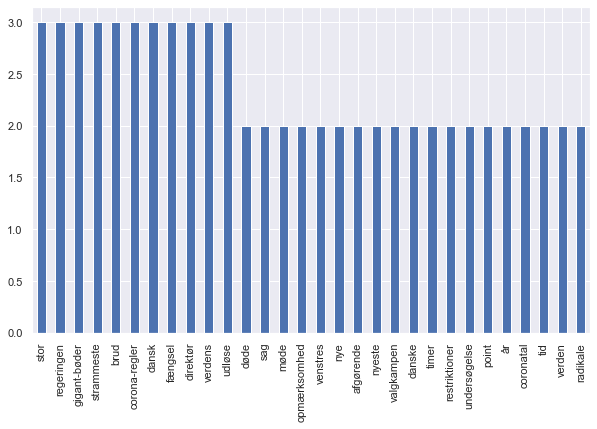

In [242]:
token_series = pd.Series(tokens)

counts = token_series.value_counts()
counts = counts[counts > 1]

counts.plot.bar()

Og med ordsky:

(-0.5, 399.5, 199.5, -0.5)

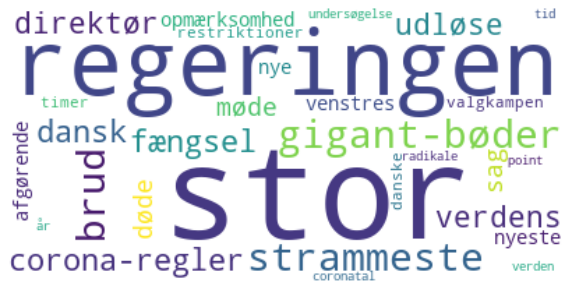

In [243]:
wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

## Udled nøgleord - tidy data tilgang

Ulempen ved ovenstående tilgang er, at det kan blive vanskeligt at koble teksten tilbage til oprindelige data.

En måde, at udføre tekstanalyser, men hvor man samtidig holder data struktureret, er ved at få data ændret på sådan en måde, at man kan koble ordbrug til bestemte tekster. 

Dette er et eksempel på en tidy data tilgang. Tidy data dikterer, at hver række i et datasæt skal være en unik observation.
Til arbejde med tekst opnår vi en del fleksibilitet ved at få et datasæt, hvor hver række indeholder:
- Teksten (fx en overskrift eller et tweet)
- Baggrundsinformation om teksten (evt. dato eller navn på twitter-bruger)
- Ordet i teksten

Det giver hurtigt et meget stort datasæt, men det har mange fordele i den senere analyse arbejde.

In [244]:
article_data.head()

,title,link,corona,trump
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False
2,Ekstra Bladet giver påtaler til tre medarbejde...,//nyheder.tv2.dk/samfund/2020-10-07-ekstra-bla...,False,False
3,Byret frifinder sygeplejerske i sag om dødelig...,//nyheder.tv2.dk/krimi/2020-10-07-byret-frifin...,False,False
4,Nyt badge skal få folk til at holde afstand fr...,//nyheder.tv2.dk/samfund/2020-10-07-nyt-badge-...,False,False


Funktion til at danne tokens:

In [246]:
def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

article_data['tokens'] = article_data['title'].apply(tokenize_function)

article_data.head()

,title,link,corona,trump,tokens
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False,"[teenagedrenge, gaderøverier]"
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,"[verdens, strammeste, corona-regler, brud, udl..."
2,Ekstra Bladet giver påtaler til tre medarbejde...,//nyheder.tv2.dk/samfund/2020-10-07-ekstra-bla...,False,False,"[ekstra, bladet, påtaler, medarbejdere, krænke..."
3,Byret frifinder sygeplejerske i sag om dødelig...,//nyheder.tv2.dk/krimi/2020-10-07-byret-frifin...,False,False,"[byret, sygeplejerske, sag, medicinfejl]"
4,Nyt badge skal få folk til at holde afstand fr...,//nyheder.tv2.dk/samfund/2020-10-07-nyt-badge-...,False,False,"[badge, folk, afstand]"


In [252]:
article_data = article_data.explode(column = 'tokens')

article_data.head()

,title,link,corona,trump,tokens
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False,teenagedrenge
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False,gaderøverier
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,verdens
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,strammeste
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,corona-regler


Hyppigste tokens:

In [256]:
article_data['tokens'].value_counts()

fængsel       3
regeringen    3
dansk         3
udløse        3
strammeste    3
             ..
kofod         1
motorvej      1
mistænkt      1
åbne          1
badge         1
Name: tokens, Length: 142, dtype: int64

Tælling af tokens per titel:

In [257]:
article_data.groupby(['title', 'tokens']).size()

title                                                                                tokens      
'Teori' kendt fra ny dansk film – hvad skal du drikke for at holde promille på 0,5?  dansk           1
                                                                                     film            1
                                                                                     kendt           1
                                                                                     promille        1
- Giroen bliver et helt andet cykelløb, siger Fuglsang                               cykelløb        1
                                                                                                    ..
Undersøgelse anbefaler fyring af direktør i Forsvarsministeriets Ejendomsstyrelse    fyring          1
                                                                                     undersøgelse    1
Ven til drabssigtet milliardær: Jeg var i chok                                

### "Hotte" emner

In [261]:
hot_topics = list(article_data['tokens'].value_counts().index[0:5])
hot_topics

['fængsel', 'regeringen', 'dansk', 'udløse', 'strammeste']

In [280]:
article_data['hot_topic'] = False

for topic in hot_topics:
    article_data.loc[article_data['hot_topic'] != True, 'hot_topic'] = article_data.loc[article_data['hot_topic'] == False, 'title'].str.contains(topic)

article_data.head()

,title,link,corona,trump,tokens,hot_topic
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False,teenagedrenge,False
0,Teenagedrenge tiltalt for 12 gaderøverier,/2020-10-07-lige-nu,False,False,gaderøverier,False
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,verdens,True
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,strammeste,True
1,Italien indfører nogle af verdens strammeste c...,//nyheder.tv2.dk/udland/2020-10-07-italien-ind...,True,False,corona-regler,True


(-0.5, 399.5, 199.5, -0.5)

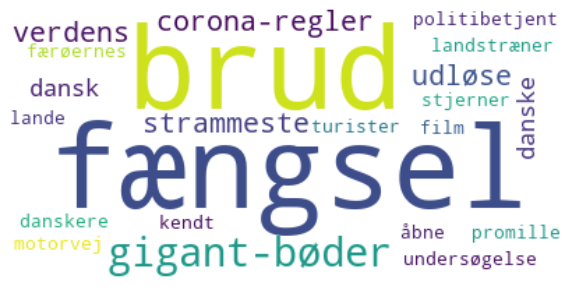

In [281]:
hot_count = article_data.loc[article_data['hot_topic'] == True, :]['tokens'].value_counts()

wc = WordCloud(background_color="white")
wc.fit_words(hot_count)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# ØVELSE: Nøgleord fra tweets

Udled nøgleord af datasættet "pol-tweets-2020_sample" (link).

Undersøg hvem der særligt tweeter om nøgleordene.


## Løsning - Liste tilgang

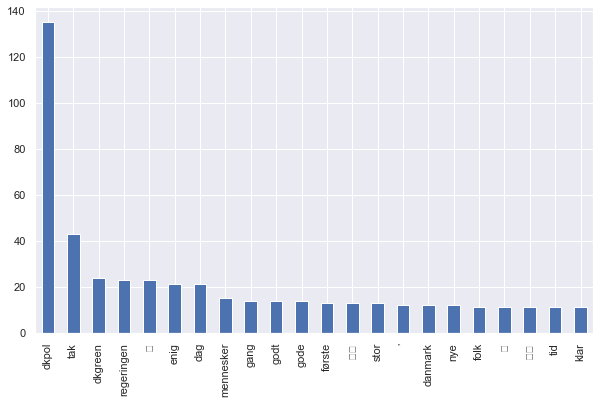

In [291]:
tweets_df = pd.read_csv('../data/pol-tweets-2020_sample.csv')

def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

tweets = ' '.join(list(tweets_df['tweet'])) # Al tekst samles i en string

tweet_tokens = tokenize_function(tweets)

tweet_tokens_series = pd.Series(tweet_tokens)

tweet_counts = tweet_tokens_series.value_counts()
tweet_counts = tweet_counts[tweet_counts > 10]

tweet_counts.plot.bar()

## LØSNING - tidy data tilgang

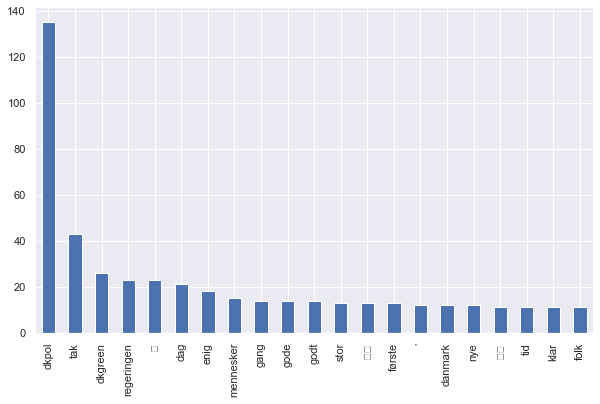

In [293]:
tweets_df = pd.read_csv('../data/pol-tweets-2020_sample.csv')

def tokenize_function(text):
    doc = nlp(text)

    tokens = []

    tokenizer = Tokenizer(nlp.vocab) # Indlæsning af tokenizer
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # Beholder adjektiver og navneord
    stopwords = list(nlp.Defaults.stop_words)
    punctuation = string.punctuation + "”"

    for token in doc:
    
        if(token.text.lower() in stopwords or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            tokens.append(token.text.lower())
        
    return(tokens)

tweets_df['tokens'] = tweets_df['tweet'].apply(tokenize_function)

tweets_df = tweets_df.explode(column = 'tokens')

tweet_counts = tweets_df['tokens'].value_counts()
tweet_counts = tweet_counts[tweet_counts > 10]

tweet_counts.plot.bar()

## LØSNING - BONUS

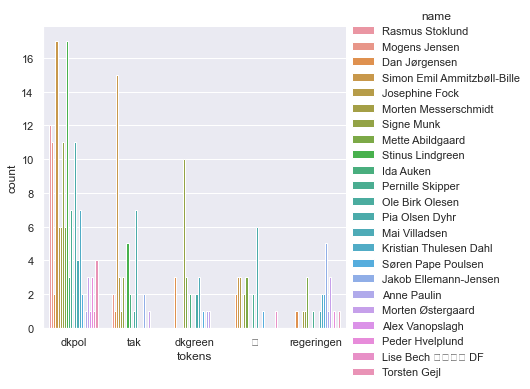

In [295]:
keywords = tweet_counts.index[0:5]

sns.catplot(data = tweets_df.loc[tweets_df['tokens'].isin(keywords), :], kind = "count", x = 'tokens', hue = 'name')

In [ ]:


# 1
tweets['klima'] = tweets['tweet'].str.contains("klima", case = False)

# 2
print(tweets['klima'].sum())

tweets.loc[tweets['klima'] == True, :].head()